In [1]:
# importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [2]:
df = pd.read_csv('Employee.csv')
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [3]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
df.describe(include ='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [6]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [7]:
num_of_unique_values= df[['Company','Age','Salary', 'Place', 'Country', 'Gender']].nunique()
print(num_of_unique_values)



Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64


In [8]:
for col in ['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender']:
    print('Unique items',col)
    print(df[col].unique())
    print()

Unique items Company
['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']

Unique items Age
[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]

Unique items Salary
[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]

Unique items Place
['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']

Unique items Country
['India']

Unique items Gender
[0 1]



In [9]:
df.iloc[20:30]

,Company,Age,Salary,Place,Country,Gender
20,TCS,37.0,3045.0,Calcutta,India,0
21,Infosys,50.0,3184.0,Delhi,India,0
22,TCS,21.0,4824.0,Mumbai,India,0
23,Infosys,NaN,5835.0,Cochin,India,0
24,TCS,NaN,7084.0,Chennai,India,1
25,Infosys,23.0,8943.0,Mumbai,India,1
26,TCS,34.0,8345.0,Calcutta,India,1
27,CTS,45.0,9284.0,Delhi,India,1
28,CTS,23.0,9876.0,Mumbai,India,1
29,CTS,35.0,2034.0,Cochin,India,0


In [10]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [11]:
len(df)

148

In [12]:
percn_null_values = ((df.isnull().sum())/(len(df)))*100
percn_null_values

Company     5.405405
Age        12.162162
Salary     16.216216
Place       9.459459
Country     0.000000
Gender      0.000000
dtype: float64

In [13]:
df.duplicated().sum()

4

In [14]:
df = df.drop_duplicates()
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [15]:
# Replace values in age 0 to NaN
df['Age'] = df['Age'].replace(0,np.nan)

In [16]:
df.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [17]:
# converting uppercase column names to lower case

df.columns = df.columns.str.lower()
df.columns

Index(['company', 'age', 'salary', 'place', 'country', 'gender'], dtype='object')

In [18]:
# Treating the null values using median,mode,mean
# company and place treat with mode
# age and salary treat with median

df['company']=df['company'].fillna(df['company'].mode()[0])
df['place']=df['place'].fillna(df['place'].mode()[0])
df['age']=df['age'].fillna(df['age'].median())
df['salary']=df['salary'].fillna(df['salary'].median())

In [19]:
df.isnull().sum()

company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64

In [20]:
df.describe()

,age,salary,gender
count,144.000000,144.000000,144.000000
mean,32.194444,5238.194444,0.222222
std,8.242206,2370.641804,0.417191
min,17.000000,1089.000000,0.000000
25%,23.750000,3045.000000,0.000000
50%,33.000000,5000.000000,0.000000
75%,36.000000,7084.000000,0.000000
max,54.000000,9876.000000,1.000000


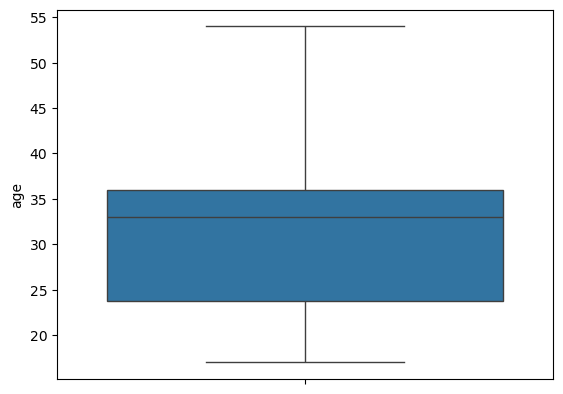

In [21]:
# outliers using box_plot
sns.boxplot(data=df['age'])
plt.show()

In [22]:
# Outliers of age using IQR
Q1_age = df['age'].quantile(0.25)
Q3_age = df['age'].quantile(0.75)

print('The value of Q1 is',Q1_age)
print('The value of Q3 is',Q3_age)

IQR = Q3_age-Q1_age
print( 'The IQR is',IQR)

lower_limit = Q1_age-1.5*IQR
upper_limit = Q3_age+1.5*IQR

print('The lower limit of IQR -',lower_limit)
print('The upper limit of IQR -',upper_limit)






The value of Q1 is 23.75
The value of Q3 is 36.0
The IQR is 12.25
The lower limit of IQR - 5.375
The upper limit of IQR - 54.375


In [23]:
iqr_age = df.loc[(df['age']<lower_limit) | (df['age']>upper_limit)]
iqr_age1= df.loc[(df['age']>lower_limit) & (df['age']<upper_limit)]
print(iqr_age['age'])
print(iqr_age1['age'])
print('The length of outliers',len(iqr_age))

Series([], Name: age, dtype: float64)
0      20.0
1      30.0
2      35.0
3      40.0
4      23.0
       ... 
142    22.0
143    33.0
145    44.0
146    33.0
147    22.0
Name: age, Length: 144, dtype: float64
The length of outliers 0


In [24]:
# Outliers of Salary  IQR
Q1_sal= df['salary'].quantile(0.25)
Q3_sal = df['salary'].quantile(0.75)

print('The value of Q1 is',Q1_sal)
print('The value of Q3 is',Q3_sal)

IQR_sal = Q3_sal-Q1_sal
print( 'The IQR is',IQR_sal)

lower_limit = Q1_sal-1.2*IQR_sal
upper_limit = Q3_sal+1.2*IQR_sal

print('The lower limit of IQR -',lower_limit)
print('The upper limit of IQR -',upper_limit)

The value of Q1 is 3045.0
The value of Q3 is 7084.0
The IQR is 4039.0
The lower limit of IQR - -1801.8000000000002
The upper limit of IQR - 11930.8


In [25]:
iqr_method = df.loc[(df['age']<lower_limit) | (df['age']>upper_limit)]
iqr_method1 = (df['age']>lower_limit) & (df['age']<upper_limit)
print('Outliers are',iqr_method['age'])
print('Not an Outliers',df[iqr_method1])
print('outliers founded',len(iqr_method))

Outliers are Series([], Name: age, dtype: float64)
Not an Outliers              company   age  salary     place country  gender
0                TCS  20.0  5000.0   Chennai   India       0
1            Infosys  30.0  5000.0    Mumbai   India       0
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[144 rows x 6 columns]
outliers founded 0


In [26]:
# finding outliers using Zscore
from scipy.stats import stats

In [27]:
z_score_salary = stats.zscore(df['salary'])
z_score_salary

C:\Users\ranje\AppData\Local\Temp\ipykernel_15876\890958727.py:1: DeprecationWarning: Please import `zscore` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  z_score_salary = stats.zscore(df['salary'])


0     -0.100827
1     -0.100827
2     -1.243735
3     -0.947426
4     -0.524127
         ...   
142    1.254576
143    1.602528
145   -0.509734
146   -0.086435
147    1.254576
Name: salary, Length: 144, dtype: float64

In [28]:
z_score = df[(z_score_salary<-3) | (z_score_salary>3)]
z_score1 = df[(z_score_salary>-3) & (z_score_salary<3)]
print('Outliers using Zscore is ',z_score)
print('Not an Outliers',z_score1)
print('Number of Outliers',len(z_score))


Outliers using Zscore is  Empty DataFrame
Columns: [company, age, salary, place, country, gender]
Index: []
Not an Outliers              company   age  salary     place country  gender
0                TCS  20.0  5000.0   Chennai   India       0
1            Infosys  30.0  5000.0    Mumbai   India       0
2                TCS  35.0  2300.0  Calcutta   India       0
3            Infosys  40.0  3000.0     Delhi   India       0
4                TCS  23.0  4000.0    Mumbai   India       0
..               ...   ...     ...       ...     ...     ...
142  Infosys Pvt Lmt  22.0  8202.0    Mumbai   India       0
143              TCS  33.0  9024.0  Calcutta   India       1
145          Infosys  44.0  4034.0     Delhi   India       1
146              TCS  33.0  5034.0    Mumbai   India       1
147          Infosys  22.0  8202.0    Cochin   India       0

[144 rows x 6 columns]
Number of Outliers 0


Data Analysing

In [30]:
# Age > 40 and salary <5000
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
filtered_df

,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


C:\Users\ranje\AppData\Local\Temp\ipykernel_15876\3225421667.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x='age', y='salary',marker = 'o',cmap='jet',data=df)


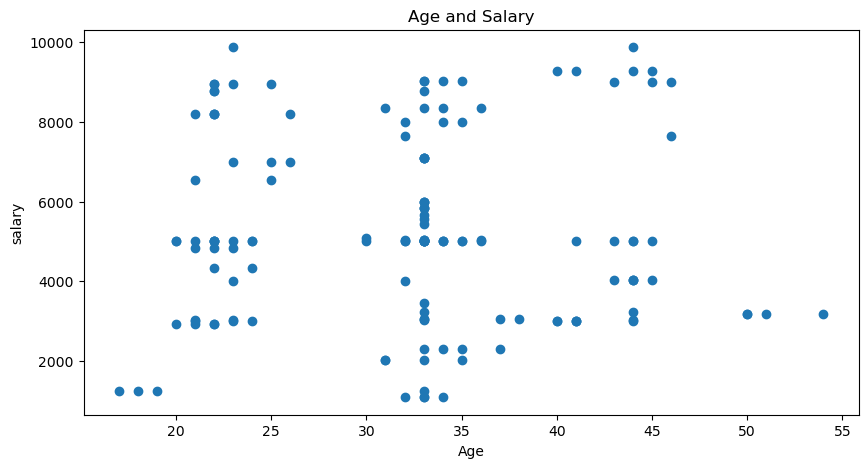

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(x='age', y='salary',marker = 'o',cmap='jet',data=df)
plt.title('Age and Salary')
plt.xlabel('Age')
plt.ylabel('salary')
plt.show()

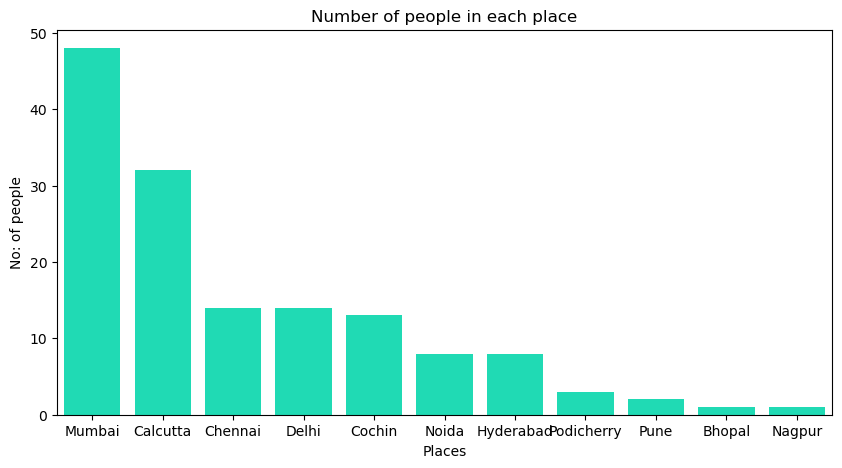

In [32]:
# Count the number of people from each palce using bar chart
team_count = df['place'].value_counts()

plt.figure(figsize=(10,5))
bar=sns.barplot(x=team_count.index,y=team_count.values,color='#01F9C6')
plt.title('Number of people in each place')
plt.xlabel('Places')
plt.ylabel('No: of people')
plt.show()



Data Encoding

In [34]:
df_onehot = pd.get_dummies(df,columns=['place','company','country'],dtype=int)
df_onehot

,age,salary,gender,place_Bhopal,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,...,place_Noida,place_Podicherry,place_Pune,company_CTS,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,country_India
0,20.0,5000.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,30.0,5000.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,35.0,2300.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,40.0,3000.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,23.0,4000.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
143,33.0,9024.0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
145,44.0,4034.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
146,33.0,5034.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1


In [35]:
from sklearn.preprocessing import LabelEncoder
label_place = LabelEncoder()
label_company = LabelEncoder()
df['place_encoded'] = label_place.fit_transform(df['place'])
df['company_encoded'] = label_company.fit_transform(df['company'])
print(df['place_encoded'])
print(df['company_encoded'])

0      2
1      6
2      1
3      4
4      6
      ..
142    6
143    1
145    4
146    6
147    3
Name: place_encoded, Length: 144, dtype: int32
0      4
1      2
2      4
3      2
4      4
      ..
142    3
143    4
145    2
146    4
147    2
Name: company_encoded, Length: 144, dtype: int32


Scaling

In [37]:
X=df_onehot.drop(columns =["salary"])
Y=df_onehot["salary"] # target
X.head()


,age,gender,place_Bhopal,place_Calcutta,place_Chennai,place_Cochin,place_Delhi,place_Hyderabad,place_Mumbai,place_Nagpur,place_Noida,place_Podicherry,place_Pune,company_CTS,company_Congnizant,company_Infosys,company_Infosys Pvt Lmt,company_TCS,company_Tata Consultancy Services,country_India
0,20.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,30.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
2,35.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,40.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
4,23.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [38]:
Y.head()

0    5000.0
1    5000.0
2    2300.0
3    3000.0
4    4000.0
Name: salary, dtype: float64

In [39]:
XY= pd.concat([X,Y],axis =1).dropna()
x=XY.drop(['salary'],axis =1)
y=XY[['salary']]



In [40]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[-1.48467637, -0.53452248, -0.0836242 , ...,  1.18321596,
        -0.11867817,  0.        ],
       [-0.26717411, -0.53452248, -0.0836242 , ..., -0.84515425,
        -0.11867817,  0.        ],
       [ 0.34157702, -0.53452248, -0.0836242 , ...,  1.18321596,
        -0.11867817,  0.        ],
       ...,
       [ 1.43732906,  1.87082869, -0.0836242 , ..., -0.84515425,
        -0.11867817,  0.        ],
       [ 0.09807657,  1.87082869, -0.0836242 , ...,  1.18321596,
        -0.11867817,  0.        ],
       [-1.24117592, -0.53452248, -0.0836242 , ..., -0.84515425,
        -0.11867817,  0.        ]])

In [41]:
m_scaler =MinMaxScaler()
min_scaler = m_scaler.fit_transform(x)
min_scaler

array([[0.08108108, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.35135135, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.48648649, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.72972973, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.43243243, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.13513514, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])